Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72090 entries, 0 to 72089
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            72090 non-null  object 
 1   Country/Region  72090 non-null  object 
 2   Province/State  21870 non-null  object 
 3   Lat             72090 non-null  float64
 4   Long            72090 non-null  float64
 5   Confirmed       72090 non-null  int64  
 6   Recovered       68310 non-null  float64
 7   Deaths          72090 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 4.4+ MB
None
First few rows:
         Date Country/Region Province/State       Lat       Long  Confirmed  \
0  2020-01-22    Afghanistan            NaN  33.93911  67.709953          0   
1  2020-01-23    Afghanistan            NaN  33.93911  67.709953          0   
2  2020-01-24    Afghanistan            NaN  33.93911  67.709953          0   
3  2020-01-25    Afghanis

<ipython-input-9-9721a7221140>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


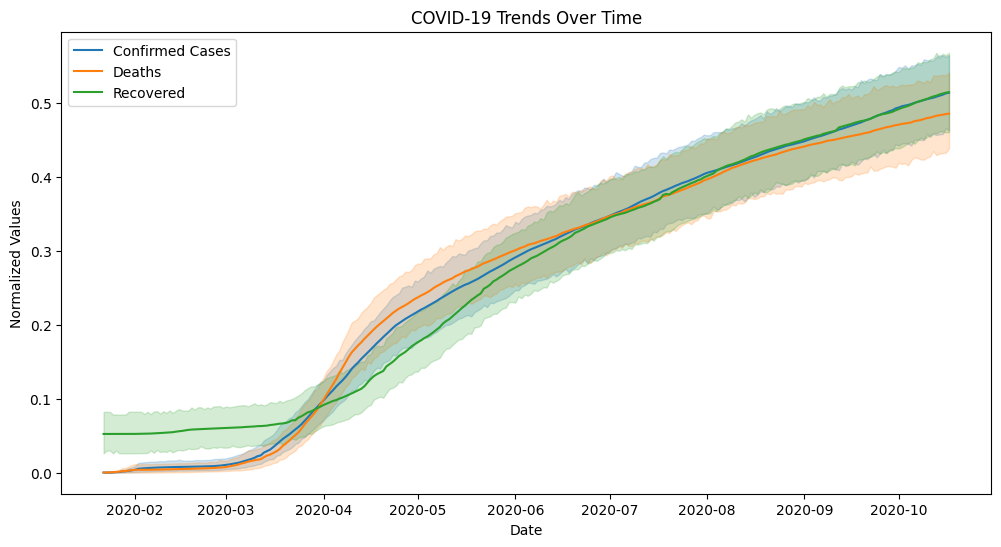

Cleaned data saved to 'cleaned_covid19_data.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the Data
url = "/content/time-series-19-covid-combined.csv" # Example dataset URL
data = pd.read_csv(url)

# Step 2: Inspect the Data
print("Data Information:")
print(data.info())
print("First few rows:")
print(data.head())

# Step 3: Data Cleaning
# Drop duplicates
data = data.drop_duplicates()

# Check for missing values and fill if necessary
data = data.fillna(method='ffill')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Step 4: Handle Outliers (IQR method)
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(df[column], lower_bound, upper_bound)

for col in ['Confirmed', 'Recovered', 'Deaths']:
    data[col] = handle_outliers(data, col)

# Step 5: Preprocessing
# Resample data to weekly frequency
data.set_index('Date', inplace=True)
weekly_data = data.resample('W').sum().reset_index()

# Add a 7-day rolling average for confirmed cases
data['Confirmed_7day_avg'] = data['Confirmed'].rolling(window=7).mean()

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
data[['Confirmed', 'Recovered', 'Deaths']] = scaler.fit_transform(data[['Confirmed', 'Recovered', 'Deaths']])

# Step 6: Data Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Confirmed', label='Confirmed Cases')
sns.lineplot(data=data, x='Date', y='Deaths', label='Deaths')
sns.lineplot(data=data, x='Date', y='Recovered', label='Recovered')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()

# Step 7: Save Cleaned Data
data.reset_index(inplace=True)
data.to_csv('cleaned_covid19_data.csv', index=False)

print("Cleaned data saved to 'cleaned_covid19_data.csv'.")